## Thinkful WELLCOME Dataset to run Data Visualization Module 

#Summary Statistics of Medical Journals
##Directions: 
1)Determine the five most common journals and the total articles for each.
2) Calculate the mean, median, and standard deviation of the open-access cost per article for each journal: See lines 93-95 for calculations.

In [24]:
#Import scipy.stats for data cleaning

import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
#Part 1 Loading an example dataset 
#wtrust_file =  '/Users/mehrunisaqayyum/Downloads/WELLCOME_APCspend2013_forThinkful.csv'
#wtrust_file = '/Users/mehrunisaqayyum/Downloads/test.csv'
#df = pd.read_csv(wtrust_file,encoding='utf8')

#comment 2/28: 
#df =pd.read_csv('/Users/mehrunisaqayyum/Downloads/WELLCOME_APCspend2013_forThinkful.csv', encoding= 'unicode_escape')
#str = unicode(str, errors='replace') #Unicode is not defined
#df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding= 'unicode_escape')
df.head()

#Insert from Reza's tutorial: pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding= 'unicode_escape')

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


## Remove Weird pound symbol

In [50]:
print(df)

                            PMID/PMCID                      Publisher  \
0                                  NaN                            CUP   
1                           PMC3679557                            ACS   
2                23043264  PMC3506128                             ACS   
3                  23438330 PMC3646402                            ACS   
4                 23438216 PMC3601604                             ACS   
...                                ...                            ...   
2122                           2901593          Wolters Kluwer Health   
2123                           3748854         Wolters Kluwer Health    
2124                           3785148         Wolters Kluwer Health    
2125          PMCID:\n    PMC3647051\n  Wolters Kluwer N.V./Lippinott   
2126  PMID: 23846567  (Epub July 2013)                Wolters Kluwers   

                                        Journal title  \
0                              Psychological Medicine   
1        

In [46]:
#Need to split the pound sign from 'COST': word_split = words.str.split('$', expand=True)
#str.lstrip([chars])

cost_string = "COST (£) charged to Wellcome (inc VAT when charged)"
temporary_cost = cost_string.strip('£')
# Argument doesn't contain space
# No characters are removed.
print(temporary_cost)

#print(random_string.lstrip('s ti'))

COST (£) charged to Wellcome (inc VAT when charged)


In [42]:
#Trying some unicode suggestion b/c  '£' not readable
!/usr/bin/env python
  # -*- coding: utf-8 -*-

cost_string = "COST (£) charged to Wellcome (inc VAT when charged), encoding = -*- coding: utf-8 -*-"
temporarycost = cost_string.strip('£')
print(temporarycost)

# Argument doesn't contain space
# No characters are removed.

Python 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)] :: Anaconda, Inc. on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 
KeyboardInterrupt
>>> 
>>> COST (£) charged to Wellcome (inc VAT when charged), encoding = -*- coding: utf-8 -*-


In [48]:
# work w/column
cost_string = "COST (£) charged to Wellcome (inc VAT when charged)"
temporarycost =  cost_string.replace('£', '')
print(temporarycost)

COST () charged to Wellcome (inc VAT when charged)


In [65]:
# Get column 'temporarycost' to take out all £
df = pd.DataFrame({'temporarycost':['0','2126']})

df['temporarycost'] = pd.to_numeric(df['temporarycost'])
print (df['temporarycost'])

0       0
1    2126
Name: temporarycost, dtype: int64


In [79]:
sum(df['temporarycost'].isnull())

0

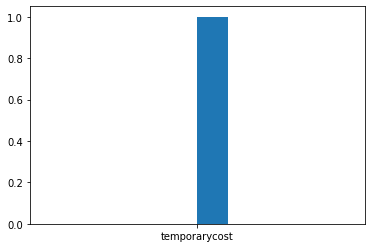

In [80]:
#Determine outliers in 'temporarycost' to see if needed to be dropped.
#Use histogram function
plt.hist('temporarycost', bins = 10)
plt.show()

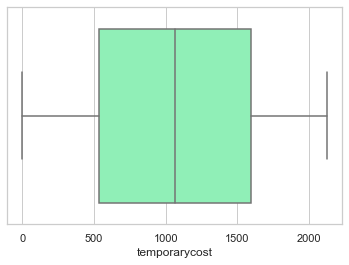

In [86]:
#Draw Boxplot after import seaborn as sns
#sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
#ax = sns.boxplot(x=tips["total_bill"])

#sns.set(style="whitegrid")
#temporarycost = sns.load_dataset("df")
#ax = sns.boxplot(x=temporarycost["temporarycost"])

sns.boxplot(x='temporarycost',data=df,palette='rainbow')

#Doesn't look like anything is out of range. Do I need to find SDs?

##Code to find outliers beyond 3SD's
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [92]:
#Could find z score above '3' standard deviations according to 
#Medium: https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32 

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for temporarycost in data_1:
        z_score= ('temporarycost' - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append('temporarycost')
    return outliers

outlier_datapoints = detect_outlier(df)
print(outlier_datapoints)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

##Determine the five most common journals and the total articles for each.

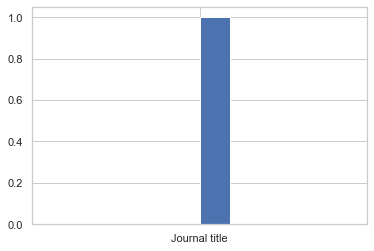

In [96]:
plt.hist('Journal title', bins = 10)
plt.show()

##Determining mean, median & SD for cost of access per article

In [93]:
df.loc[:,"temporarycost"].mean()
# £1,063 is the mean cost of open-access cost per article for each journal.

1063.0

In [94]:
df.loc[:,"temporarycost"].median()
# £1,063 is the median cost of open-access cost per article for each journal.

1063.0

In [95]:
df.loc[:,"temporarycost"].std()
# £1,503 is one Standard Deviation away from the the median cost of open-access cost per article for each journal.

1503.3090168026001

##Check columns for Null

In [19]:
sum(df['PMID/PMCID'].isnull())

199

In [20]:
 sum(df['Publisher'].isnull()) 

0

In [21]:
 sum(df['Journal title'].isnull()) 

1

In [22]:
 sum(df['Article title'].isnull()) 

0

In [23]:
sum(df['COST (£) charged to Wellcome (inc VAT when charged)'])
#SEE line for creating "temporarycost" which addresses the weird character issue

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
#Remove all missing value rows in any columns
print(df.dropna())

In [28]:
wtrust_file =  '/Users/mehrunisaqayyum/Downloads/WELLCOME_APCspend2013_forThinkful.csv'

In [ ]:
#Drop missing values when missing in two columns: print(df.dropna(subset=['Acolumn'] + ['Bcolumn']))
#Drop missing values in one or other: print(df.dropna(subset=['gender','height']))


In [ ]:
#  int(some_string)

In [ ]:
#Remove white space: print(spacy.strip()) 